In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Set as 0 if using results from no control simulation
# Set as 1 if using results from control, flow/TSS load simulation
# Set as 2 if using results from control, flow simulation
# Set as 3 if using results from control, TSS load simulation
save = [0,2,3]

stormNo = '2'

controlNo = ['0','05','05']

(15, 27)

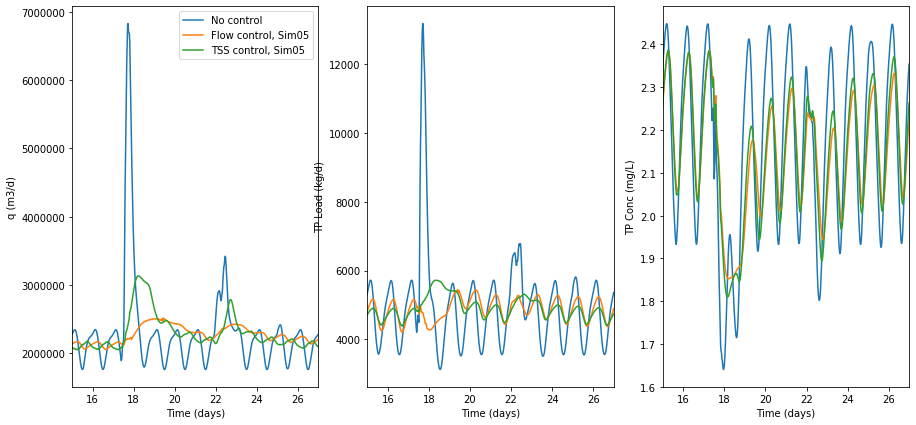

In [49]:
fig, axes = plt.subplots(1,3, figsize=(15,7))
xlim1 = 15; xlim2 = 27

for i in range(0,len(save)):
    # Load storm event data (LBC results, for sewer subsection only)
    # WRRF flow is in units of cubic feet/sec
    # WRRF TSS load is in units of lb/sec
    # WRRF TSS concentration is in units of mg/L
    
    if save[i] == 0:
        r_stormTSV = '../data/storm'+stormNo+'_nc_influent.tsv'
        storm = pd.read_table(r_stormTSV, sep='\t')
        plotlabel = 'No control'
    elif save[i] == 1:
        r_stormTSV = '../data/storm'+stormNo+'_c_both_'+controlNo[i]+'_influent.tsv'
        storm = pd.read_table(r_stormTSV, sep='\t')
        plotlabel = 'Both control, Sim'+controlNo[i]
    elif save[i] == 2:
        r_stormTSV = '../data/storm'+stormNo+'_c_flow_'+controlNo[i]+'_influent.tsv'
        storm = pd.read_table(r_stormTSV, sep='\t')
        plotlabel = 'Flow control, Sim'+controlNo[i]
    elif save[i] == 3:
        r_stormTSV = '../data/storm'+stormNo+'_c_TSS_'+controlNo[i]+'_influent.tsv'
        storm = pd.read_table(r_stormTSV, sep='\t')
        plotlabel = 'TSS control, Sim'+controlNo[i]
    
    axes[0].plot(storm["Sumo__Time"].values, storm["Sumo__Plant__Influent__param__Q"].values, 
            label=plotlabel)
    
    axes[1].plot(storm["Sumo__Time"].values, 
                 np.multiply(storm["Sumo__Plant__Influent__param__Q"].values,storm["Sumo__Plant__Influent__param__TP"].values)/1000, 
            label=plotlabel)
    
    axes[2].plot(storm["Sumo__Time"].values, storm["Sumo__Plant__Influent__param__TP"].values, 
            label=plotlabel)

axes[0].set_xlabel('Time (days)')
axes[0].set_ylabel('q (m3/d)')
axes[0].set_xlim(xlim1,xlim2)
#axes[0].set_ylim(0,7000000)
axes[0].legend()

axes[1].set_xlabel('Time (days)')
axes[1].set_ylabel('TP Load (kg/d)')
axes[1].set_xlim(xlim1,xlim2)
#axes[1].set_ylim(0.,1.5)
#axes[1].legend()

axes[2].set_xlabel('Time (days)')
axes[2].set_ylabel('TP Conc (mg/L)')
axes[2].set_xlim(xlim1,xlim2)
#axes[2].set_ylim(0.,1.5)
#axes[2].legend()